In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", rc={'figure.figsize':(11,9)})
sns.set_palette('colorblind');
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
df = pd.read_csv("pseudo_facebook.tsv", sep = '\t')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### dob_day

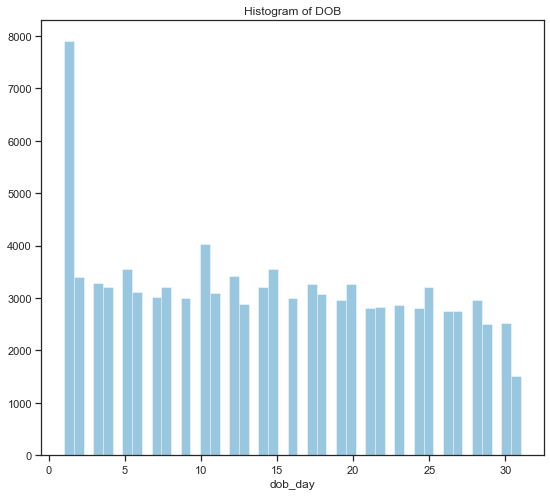

In [3]:
plt.figure(figsize = (9,8));
sns.distplot(df['dob_day'], kde = False);
plt.title("Histogram of DOB");

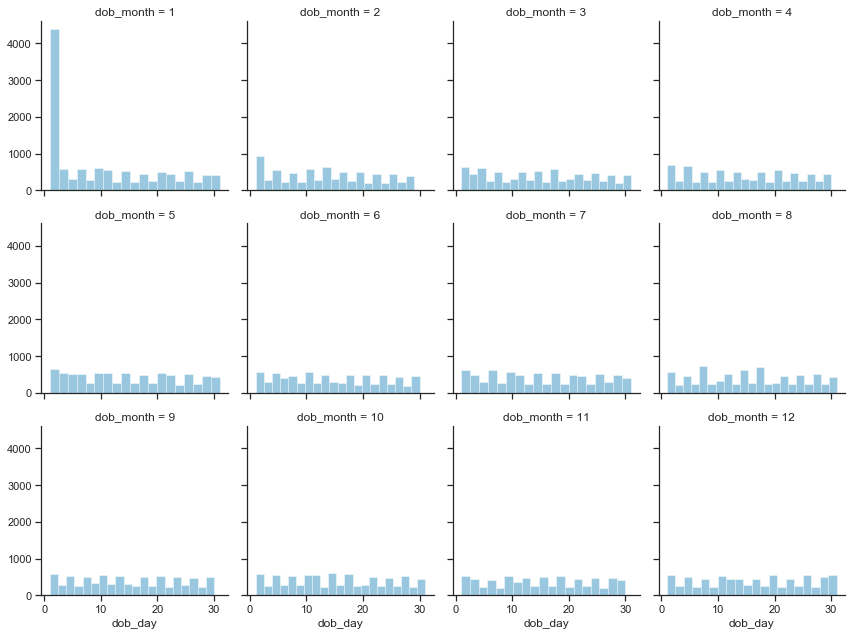

In [4]:
g = sns.FacetGrid(df, col = "dob_month", col_wrap = 4);
g = g.map(sns.distplot, 'dob_day', kde=  False);

In [5]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [6]:
(df['friend_count'].min(), df['friend_count'].max())

(0, 4923)

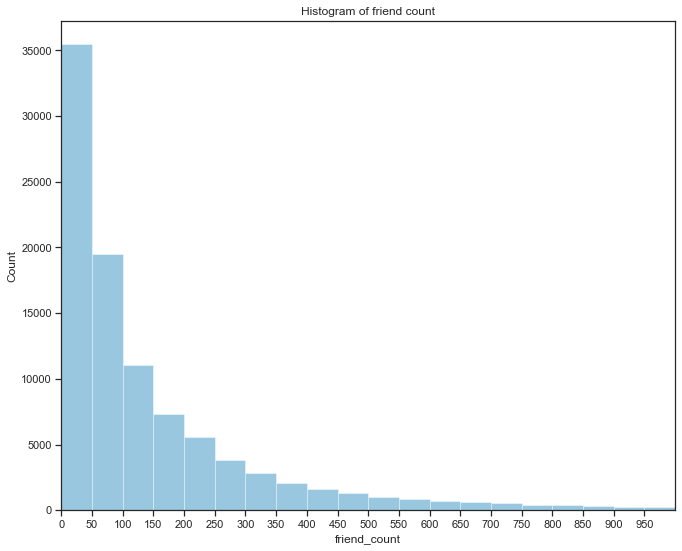

In [7]:
sns.distplot(df['friend_count'], kde = False, );
plt.ylabel("Count");
plt.xlim((0,1000));
plt.xticks(list(range(0,1000,50)));
plt.title("Histogram of friend count");

Who has more fiends male or female?

In [8]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

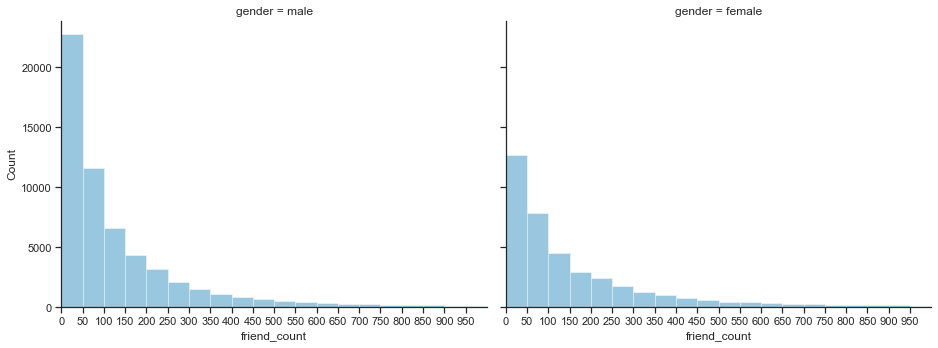

In [18]:
g = sns.FacetGrid(data = df, col = 'gender', height = 5, aspect = 1.3);
g = (g.map(sns.distplot, 'friend_count', kde = False,bins = np.arange(0, 5000, 50)).
    set(xlim=(0,1000), xticks = list(range(0, 1000, 50))));
g.set_ylabels('Count');

In [10]:
df['gender'].value_counts(dropna = False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [12]:
df.groupby('gender')['friend_count'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,241.969941,476.039706,0.0,37.0,96.0,244.0,4923.0
male,58574.0,165.035459,308.466702,0.0,27.0,74.0,182.0,4917.0


In [20]:
df['tenure'].min(), df['tenure'].max()

(0.0, 3139.0)

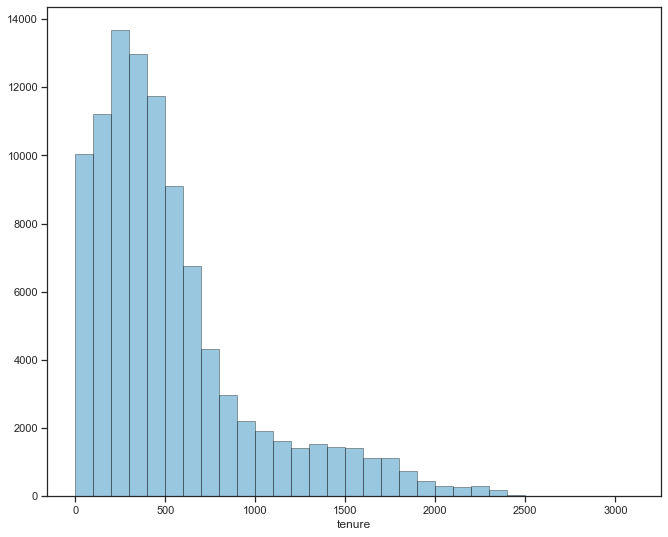

In [26]:
sns.distplot(df['tenure'], bins = np.arange(0,3200,100), kde = False, hist_kws = {'edgecolor':'k'});

In [28]:
df['friend_count'].describe()

count    99003.000000
mean       196.350787
std        387.304229
min          0.000000
25%         31.000000
50%         82.000000
75%        206.000000
max       4923.000000
Name: friend_count, dtype: float64

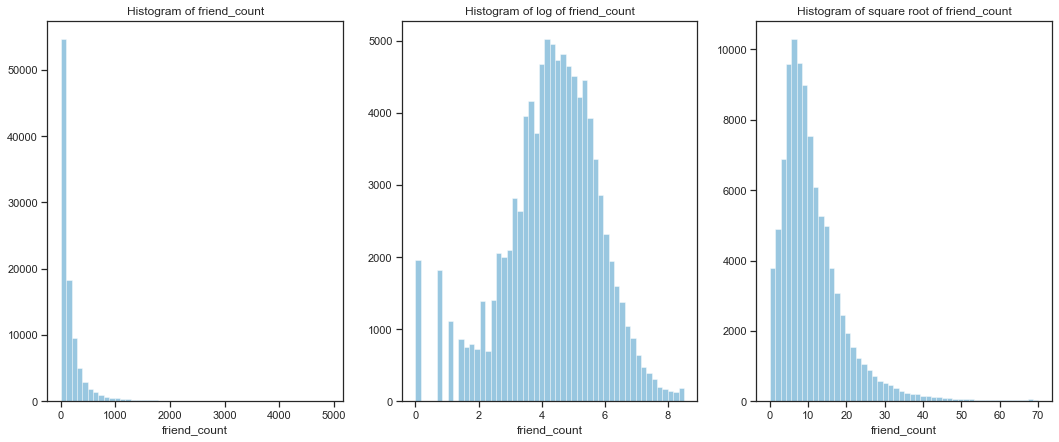

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,7));

sns.distplot(df['friend_count'], kde = False,ax = ax1);
ax1.set_title('Histogram of friend_count');

sns.distplot(np.log(df['friend_count']+1), kde = False, ax = ax2); 
ax2.set_title('Histogram of log of friend_count');

sns.distplot(np.sqrt(df['friend_count']), kde = False,ax = ax3); 
ax3.set_title('Histogram of square root of friend_count');

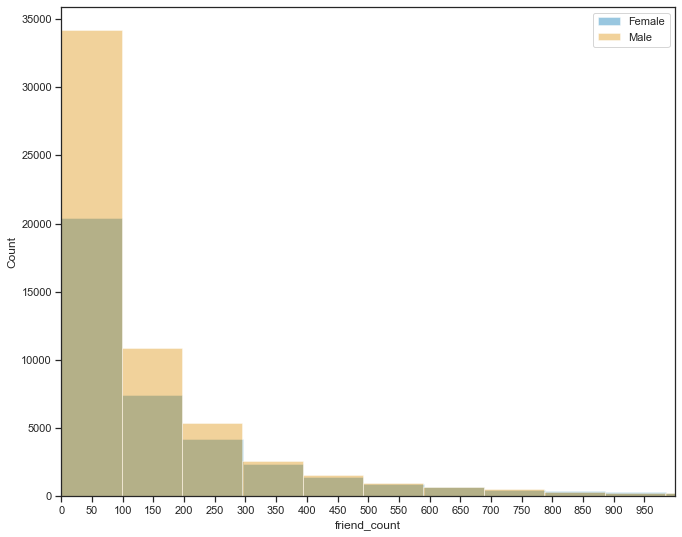

In [49]:
fig,ax = plt.subplots()
sns.distplot(df.loc[df['gender']=='female','friend_count'], kde = False, hist=True,ax = ax, label = 'Female');
sns.distplot(df.loc[df['gender']=='male', 'friend_count'], kde = False, hist=True,ax = ax, label = 'Male');
plt.ylabel("Count");
plt.xlim((0,1000));
plt.xticks(list(range(0,1000,50)));
plt.legend();
plt.show();
ax.set_title("Histogram of friend_count genderwise");

In [48]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


Which gender received more www_likes_received?

In [51]:
df['www_likes_received'].describe()

count     99003.000000
mean         58.568831
std         601.416348
min           0.000000
25%           0.000000
50%           2.000000
75%          20.000000
max      129953.000000
Name: www_likes_received, dtype: float64

In [57]:
df.groupby('gender')['www_likes_received'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,104.334451,864.787672,0.0,1.0,9.0,56.0,129953.0
male,58574.0,27.078533,307.943985,0.0,0.0,1.0,8.0,39213.0


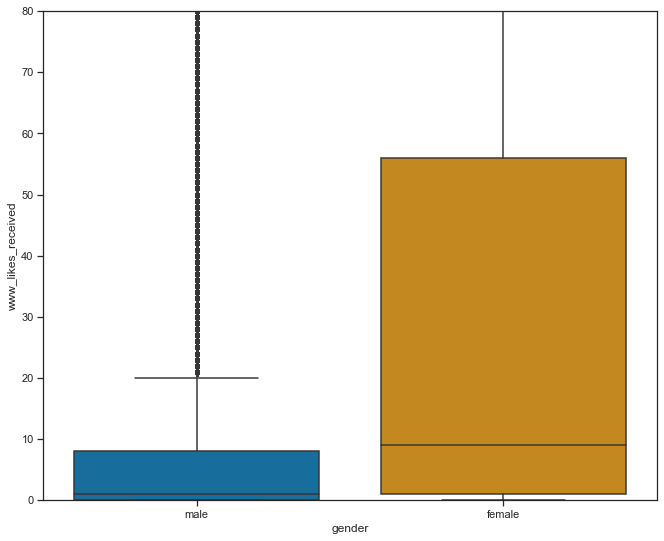

In [61]:
sns.boxplot(data = df, x = 'gender', y = 'www_likes_received');
plt.ylim((0,80));

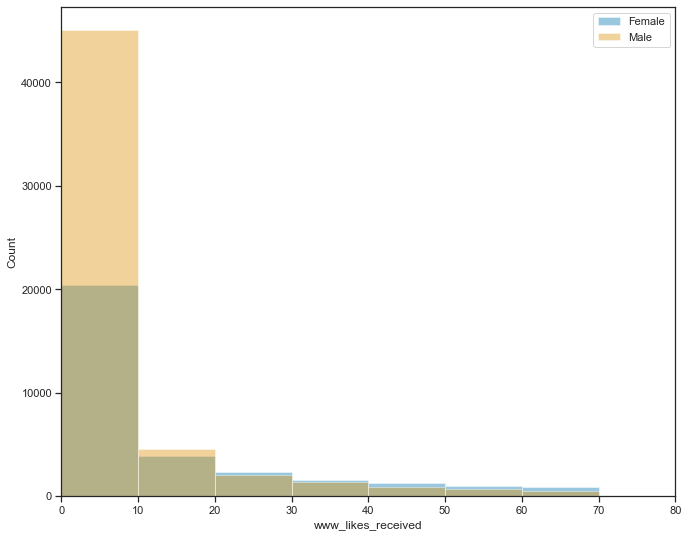

In [65]:
fig,ax = plt.subplots()
# sns.distplot(df['www_likes_received'], kde = False, bins= np.arange(0,80,10));
sns.distplot(df.loc[df['gender']=='female','www_likes_received'],kde=False,bins= np.arange(0,80,10),hist=True,ax=ax,label='Female');
sns.distplot(df.loc[df['gender']=='male', 'www_likes_received'], kde = False, bins= np.arange(0,80,10),hist=True,ax = ax, label = 'Male');
plt.ylabel("Count");
plt.xlim((0,80));
# plt.xticks(list(range(0,200,20)));
plt.legend();
plt.show();
ax.set_title("Histogram of www_likes_received genderwise");

In [66]:
df.groupby('gender')['www_likes_received'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,104.334451,864.787672,0.0,1.0,9.0,56.0,129953.0
male,58574.0,27.078533,307.943985,0.0,0.0,1.0,8.0,39213.0


In [67]:
df.groupby('gender')['www_likes_received'].sum()

gender
female    4199879
male      1586098
Name: www_likes_received, dtype: int64

In [73]:
df.groupby('gender')['friend_count'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,241.969941,476.039706,0.0,37.0,96.0,244.0,4923.0
male,58574.0,165.035459,308.466702,0.0,27.0,74.0,182.0,4917.0


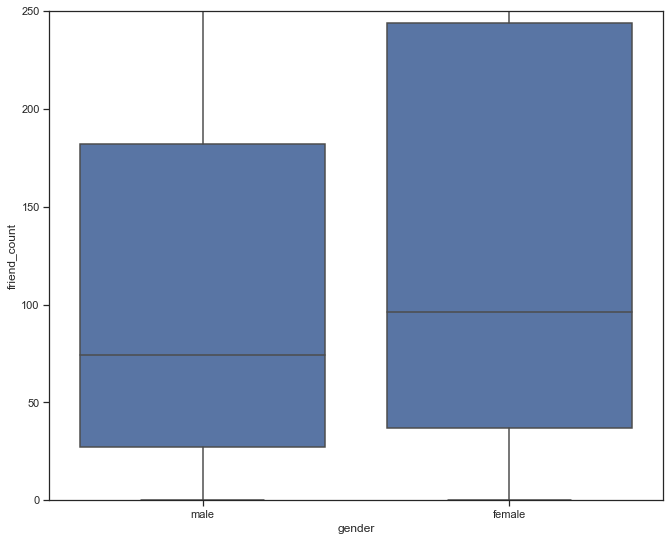

In [72]:
sns.boxplot(data = df, x = 'gender', y = 'friend_count', color = 'b');
plt.ylim((0,250));

In [74]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [76]:
df.groupby('gender')['friendships_initiated'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,113.899091,195.139308,0.0,19.0,49.0,124.75,3654.0
male,58574.0,103.066600,184.292570,0.0,15.0,44.0,111.00,4144.0


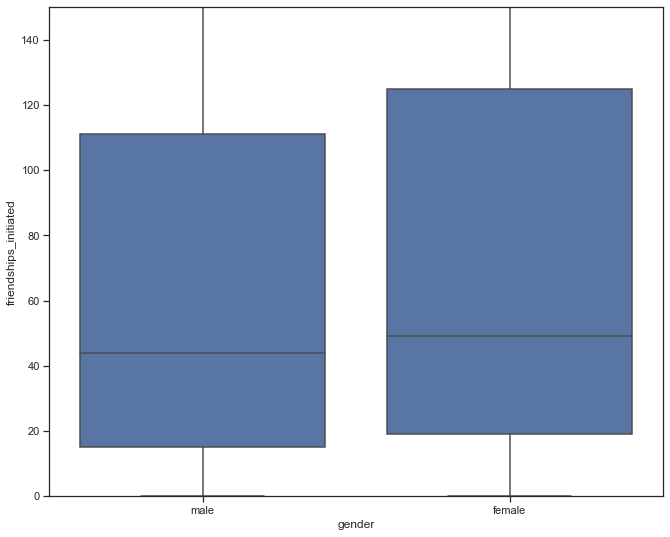

In [87]:
sns.boxplot(data = df, x = 'gender', y = 'friendships_initiated', color = 'b');
plt.ylim((0,150));

In [90]:
(df['mobile_likes']>0).value_counts()

True     63947
False    35056
Name: mobile_likes, dtype: int64

In [91]:
df['mobile_check_in'] = np.where(df['mobile_likes']>0, 1, 0)

In [98]:
df['mobile_check_in'].value_counts(normalize = True)*100

1    64.590972
0    35.409028
Name: mobile_check_in, dtype: float64